In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x=pd.read_csv("GUJARAT REGION.csv")


In [3]:
columns_to_drop = ["Unnamed: 0"]
data_clean = x.drop(columns_to_drop,axis = 1)
x = data_clean


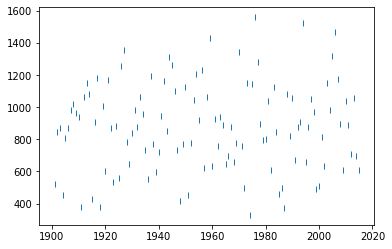

In [4]:
y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'|')
plt.show()

In [5]:
flood=[]
june=[]
sub=[]
#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))


#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#flood,rain,heavy rain
for i in range(0,len(x1)):
    if x1[i]>1400 or june[i] > 110 or sub[i] > 220:
        flood.append('1')
    elif x1[i] < 400  or june[i] < 30  or sub[i] < 50:
        flood.append('0')
    else:
        flood.append('-1')





df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      

        SUBDIVISION  YEAR   JAN   FEB   MAR  APR   MAY    JUN    JUL    AUG  \
0    GUJARAT REGION  1901   4.2   0.0   0.6  1.6   7.0   60.3  240.2  205.4   
1    GUJARAT REGION  1902   3.9   0.0   0.0  0.6   1.0   32.8  229.8  299.0   
2    GUJARAT REGION  1903   0.3   0.1   1.4  0.0  12.3   30.1  452.9  202.0   
3    GUJARAT REGION  1904   0.8  10.6  16.8  0.2   3.9   48.3  194.8   71.8   
4    GUJARAT REGION  1905   0.1   0.7   1.1  0.3   0.0   20.1  668.3   37.9   
5    GUJARAT REGION  1906   0.0  12.7   0.0  0.0   0.1  177.5  311.5  247.1   
6    GUJARAT REGION  1907   0.3  14.6   0.2  2.1   0.4   72.4  325.0  564.4   
7    GUJARAT REGION  1908   5.2   0.3   0.2  0.0   0.1   67.5  562.1  366.0   
8    GUJARAT REGION  1909   0.1   0.5   0.1  5.5   2.6  160.5  415.6  242.6   
9    GUJARAT REGION  1910   0.6   0.0   0.0  0.1   0.0  262.6  290.2  338.5   
10   GUJARAT REGION  1911   3.5   0.0  18.9  0.0   0.9  158.0   66.7   93.4   
11   GUJARAT REGION  1912   0.1   0.0   0.0  0.2   0

In [6]:

import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1 or -1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING
X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [8]:
Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X_test,Y_test)) 


0.896551724137931


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
np.unique(y1)

array(['-1', '0', '1'], dtype=object)

In [10]:
import pickle
Pkl_Filename = "Gujrat.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(Lr, file)